In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [45]:
data=pd.read_csv("Downloads\datasets_21168_27278_Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [46]:
data.shape

(1258, 6)

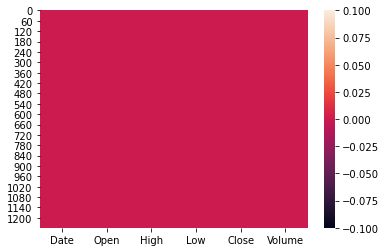

In [47]:
sb.heatmap(pd.isnull(data))

In [48]:
data["Date"]=pd.to_datetime(data["Date"])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB


In [50]:
data["Close"]=data["Close"].str.replace(",","").astype(float)

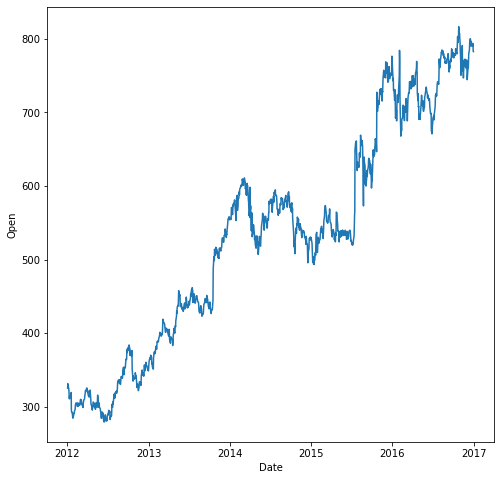

In [65]:
plt.figure(figsize=(8,8))
sb.lineplot(x=data["Date"],y=data["Open"])

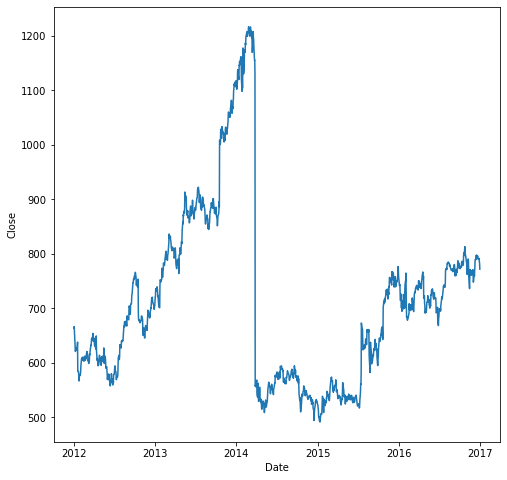

In [66]:
plt.figure(figsize=(8,8))
sb.lineplot(data["Date"],data["Close"])

In [62]:
data.iloc[data["Close"].idxmin()]["Date"]

Timestamp('2015-01-12 00:00:00')

so in 2015-01-12 the stock market has minimum close price

In [64]:
data.iloc[data["Close"].idxmax()]["Date"]

Timestamp('2014-02-26 00:00:00')

In 2014-02-26 the stock market has maximum close price. After that it suffers sudden crash.

In [69]:
from fbprophet import Prophet

In [73]:
df=data[["Date","Close"]]
df.rename(columns={"Date":"ds","Close":"y"},inplace=True)

In [74]:
df.head()

,ds,y
0,2012-01-03,663.59
1,2012-01-04,666.45
2,2012-01-05,657.21
3,2012-01-06,648.24
4,2012-01-09,620.76


In [86]:
m=Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)

In [87]:
m.fit(df)

In [94]:
future_dates=m.make_future_dataframe(periods=180)
future_dates

,ds
0,2012-01-03
1,2012-01-04
2,2012-01-05
3,2012-01-06
4,2012-01-09
...,...
1433,2017-06-24
1434,2017-06-25
1435,2017-06-26
1436,2017-06-27


In [95]:
prediction_=m.predict(future_dates)
prediction_[["yhat_lower","yhat_upper"]].tail(30)

,yhat_lower,yhat_upper
1408,621.955048,1000.316654
1409,630.640205,1009.226492
1410,622.207476,1020.430829
1411,615.328492,1004.856402
1412,625.013611,1010.432235
1413,634.124951,1028.170761
1414,620.484770,1007.782247
1415,627.751698,1009.956575
1416,612.327608,1000.759514
1417,622.174073,1015.938661


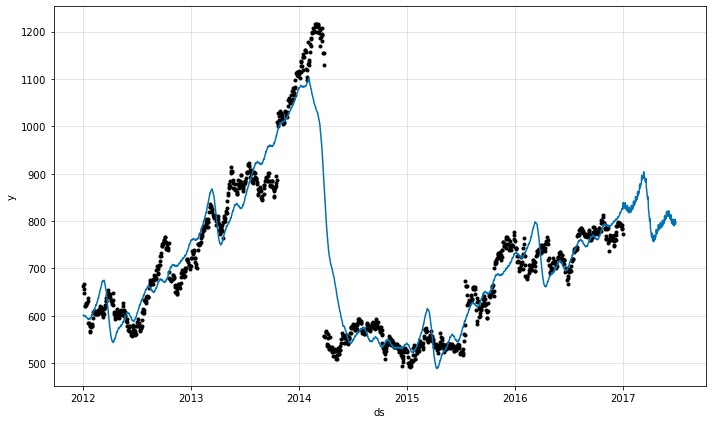

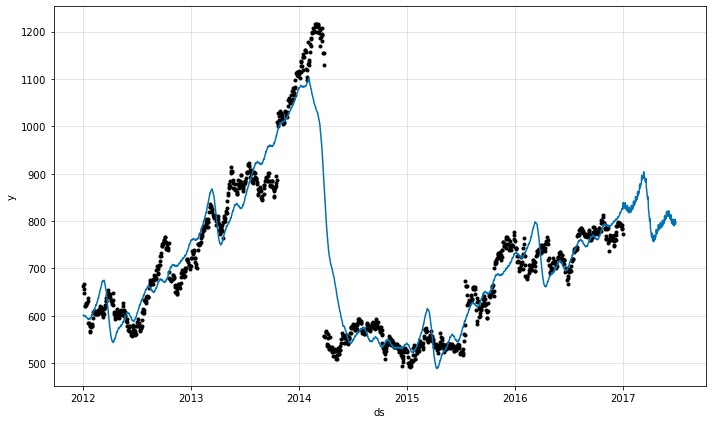

In [96]:
m.plot(prediction_,uncertainty=False)

stock price will drop in next six months.